# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [15]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [6]:
σ = 1

## Simulations

In [16]:
nsample = 1000

θ1 = numpy.array([0.2])
ma1 = arima.maq(θ1, nsample)

θ2 = numpy.array([0.2, 0.4])
ma2 = arima.maq(θ2, nsample)

θ3 = numpy.array([0.2, 0.4, 0.5])
ma3 = arima.maq(θ3, nsample)

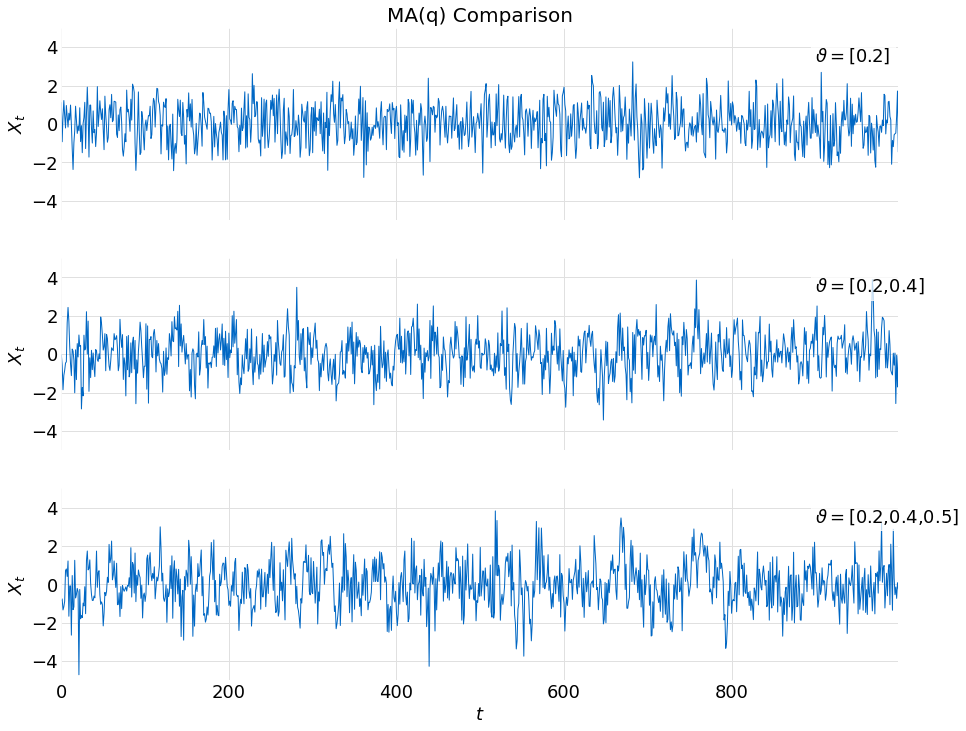

In [17]:
labels = [r"$\vartheta=$"+f"{numpy.array2string(θ1, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ2, precision=2, separator=',')}",
          r"$\vartheta=$"+f"{numpy.array2string(θ3, precision=2, separator=',')}"]
title = "ΜΑ(q) Comparison"
samples = numpy.array([ma1, ma2, ma3])
plots.time_series_stack(samples, [-5.0, 5.0], labels, title)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = 0.2$

In [19]:
results = arima.ma_estimate(ma1, 1)
results.polynomial_ma, result.bse

(array([1.        , 0.19776357]), array([0.07953037]))

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1418.858
Date:                Sat, 19 Mar 2022   AIC                           2843.716
Time:                        15:04:46   BIC                           2858.439
Sample:                             0   HQIC                          2849.312
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0143      0.038      0.377      0.706      -0.060       0.089
ma.L1          0.1978      0.032      6.259      0.000       0.136       0.260
sigma2         0.9998      0.048     20.640      0.000       0.905       1.095
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.71   Prob(JB):                         0.14
Heteroskedasticity (H):               1.02   Skew:                            -0.06
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(2)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4]$

In [23]:
results = arima.ma_estimate(ma2, 2)
results.polynomial_ma, result.bse

(array([1.        , 0.23026805, 0.39547963]), array([0.07953037]))

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1379.659
Date:                Sat, 19 Mar 2022   AIC                           2767.319
Time:                        15:06:35   BIC                           2786.950
Sample:                             0   HQIC                          2774.780
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0203      0.050      0.411      0.681      -0.077       0.117
ma.L1          0.2303      0.029      7.841      0.000       0.173       0.288
ma.L2          0.3955      0.030     13.241      0.000       0.337       0.454
sigma2         0.9241      0.042     22.107      0.000       0.842       1.006
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.70   Prob(JB):                         0.87
Heteroskedasticity (H):               1.03   Skew:                             0.04
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### $\text{MA}(3)$ Example

The parameter used in the $\text{MA}(q)$ simulation is $\varphi = [0.2, 0.4, 0.5]$

In [25]:
results = arima.ma_estimate(ma3, 3)
results.polynomial_ma, result.bse

(array([1.        , 0.21934146, 0.40387758, 0.51688763]), array([0.07953037]))

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1403.250
Date:                Sat, 19 Mar 2022   AIC                           2816.501
Time:                        15:10:16   BIC                           2841.040
Sample:                             0   HQIC                          2825.827
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0138      0.067     -0.206      0.837      -0.145       0.117
ma.L1          0.2193      0.028      7.822      0.000       0.164       0.274
ma.L2          0.4039      0.025     16.151      0.000       0.355       0.453
ma.L3          0.5169      0.027     19.233      0.000       0.464       0.570
sigma2         0.9679      0.042     23.251      0.000       0.886       1.049
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.68   Prob(JB):                         0.47
Heteroskedasticity (H):               1.13   Skew:                            -0.04
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""